In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Data Understanding

In [3]:
company_data.shape

(400, 11)

In [1]:
company_data.isna().sum()

NameError: name 'company_data' is not defined

In [2]:
company_data.dtypes

NameError: name 'company_data' is not defined

## Data Preprocessing

In [3]:
company_data['ShelveLoc'].unique(),company_data['Urban'].unique(),company_data['US'].unique()

NameError: name 'company_data' is not defined

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
company_data['ShelveLoc'] = le.fit_transform(company_data['ShelveLoc'])
company_data['Urban'] = le.fit_transform(company_data['Urban'])
company_data['US'] = le.fit_transform(company_data['US'])

In [9]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [10]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


#### Converting sales into categorical variable

In [11]:
company_data.insert(11,"sales_variable",'')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_variable
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,
396,6.14,139,23,3,37,120,2,55,11,0,1,
397,7.41,162,26,12,368,159,2,40,18,1,1,
398,5.94,100,79,7,284,95,0,50,12,1,1,


In [12]:
for i in range(0,len(company_data['Sales'])):
    if company_data['Sales'][i]>=11.0:
        company_data['sales_variable'][i] = 'High'
    elif company_data['Sales'][i]<=6.0:
        company_data['sales_variable'][i] = 'Low'
    else:
        company_data['sales_variable'][i] = 'Medium'

In [13]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_variable
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Medium
397,7.41,162,26,12,368,159,2,40,18,1,1,Medium
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


## Model Building

In [14]:
x = company_data.drop(labels=['sales_variable','Sales'],axis=1)
y = company_data['sales_variable']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12,stratify=y)

## Model Training | Testing | Evaluation

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
y_pred = dt_model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
accuracy_score(y_test,y_pred)

0.6875

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.36      0.40      0.38        10
         Low       0.75      0.81      0.78        26
      Medium       0.73      0.68      0.71        44

    accuracy                           0.69        80
   macro avg       0.62      0.63      0.62        80
weighted avg       0.69      0.69      0.69        80



In [21]:
confusion_matrix(y_test,y_pred)

array([[ 4,  0,  6],
       [ 0, 21,  5],
       [ 7,  7, 30]], dtype=int64)

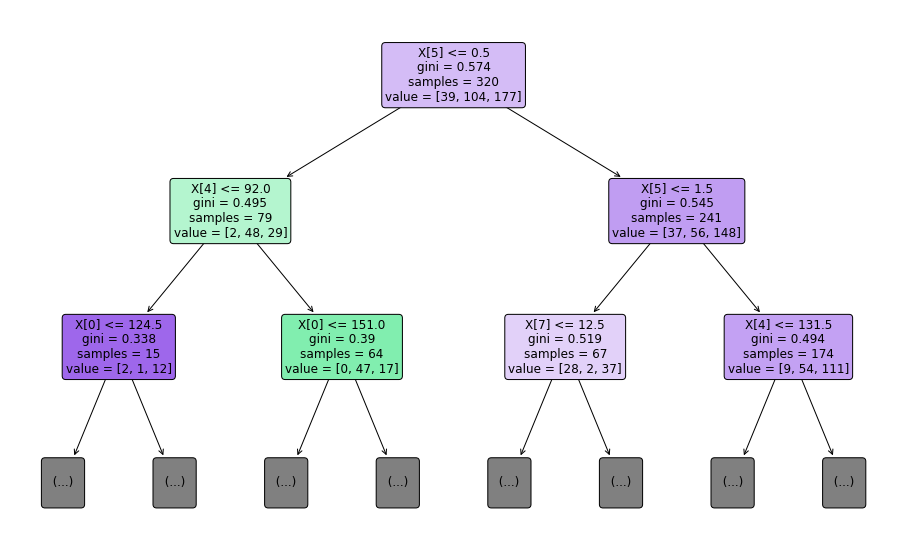

In [22]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dt_model,filled=True,rounded=True,max_depth=2,fontsize=12)
plt.show()

#### GridsearchCV to tweak the required hyperparameters

In [23]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=dt_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4]})
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.675


In [24]:
dt_model_cv=DecisionTreeClassifier(max_depth=8,min_samples_leaf=1)
dt_model_cv.fit(x_train,y_train)
y_pred=dt_model_cv.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6375


## Feature Selection Technique

In [25]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=DecisionTreeClassifier())
rfe.fit(x_train,y_train)

RFE(estimator=DecisionTreeClassifier())

In [26]:
rfe.get_support()

array([ True,  True,  True, False,  True,  True, False, False, False,
       False])

In [27]:
rfe_features = x_train.columns[rfe.get_support()]
rfe_features

Index(['CompPrice', 'Income', 'Advertising', 'Price', 'ShelveLoc'], dtype='object')

In [28]:
x_train_transform_rfe = rfe.transform(x_train)
x_test_transform_rfe = rfe.transform(x_test)

In [29]:
rfe_model = DecisionTreeClassifier()
rfe_model.fit(x_train_transform_rfe,y_train)

DecisionTreeClassifier()

In [30]:
y_pred_rfe = rfe_model.predict(x_test_transform_rfe)

In [31]:
print('accuracy score is ',accuracy_score(y_test,y_pred_rfe))
print('Confusion matrix is \n',confusion_matrix(y_test,y_pred_rfe))
print('classification report \n',classification_report(y_test,y_pred_rfe))

accuracy score is  0.6875
Confusion matrix is 
 [[ 5  0  5]
 [ 0 16 10]
 [ 5  5 34]]
classification report 
               precision    recall  f1-score   support

        High       0.50      0.50      0.50        10
         Low       0.76      0.62      0.68        26
      Medium       0.69      0.77      0.73        44

    accuracy                           0.69        80
   macro avg       0.65      0.63      0.64        80
weighted avg       0.69      0.69      0.69        80



In [32]:
imp_feature_rfe=rfe_model.feature_importances_

In [33]:
rfe_data=pd.DataFrame({'feature':rfe_features,'imp_feature':imp_feature_rfe})
rfe_data=rfe_data.sort_values('imp_feature')

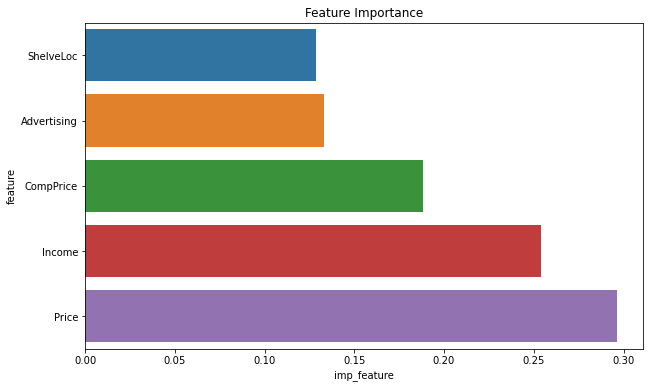

In [34]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=rfe_data)
plt.show()

#### Inference

price is the important feature contribute the sales